In [55]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
server = 'ATE_SERVER' 
database = 'ate_db_tblfinal_new' 
username = 'ate_oper' 
password = 'ate.oper' 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT Item77, tDatetime FROM dbo.TblFinal where (tDateTime between '2022-03-01 12:00:00:00' and '2022-03-10 23:30:00:00') and (ProductName like 'DESCENT G1%');"
# Item77=CN by ref.
df = pd.read_sql(query, cnxn)
df

,Item77,tDatetime
0,101837.750000,2022-03-02 01:57:55
1,0.000000,2022-03-02 02:00:35
2,0.000000,2022-03-02 02:00:50
3,0.029999,2022-03-02 02:00:50
4,0.000000,2022-03-02 02:00:30
...,...,...
40986,30.000000,2022-03-08 04:54:27
40987,30.000000,2022-03-08 04:55:30
40988,30.000000,2022-03-08 04:55:45
40989,30.000000,2022-03-08 04:56:02


In [103]:
df = df[(df['Item77']<20)&(df['Item77']>-20)]

In [109]:
df['day'] = df['tDatetime'].dt.day

<ipython-input-109-65cbb3e28126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['tDatetime'].dt.day


In [110]:
df

,Item77,tDatetime,day
1,0.000000,2022-03-02 02:00:35,2
2,0.000000,2022-03-02 02:00:50,2
3,0.029999,2022-03-02 02:00:50,2
4,0.000000,2022-03-02 02:00:30,2
5,0.000000,2022-03-02 02:00:28,2
...,...,...,...
40923,0.000000,2022-03-07 04:07:49,7
40924,0.000000,2022-03-07 04:08:35,7
40925,0.000000,2022-03-07 04:11:11,7
40926,0.000000,2022-03-07 04:13:39,7


<AxesSubplot:xlabel='day'>

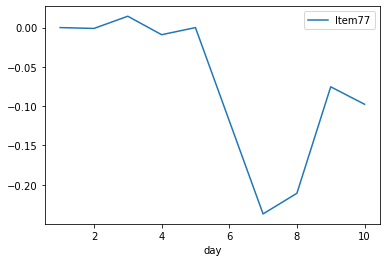

In [114]:
df.groupby('day').mean().plot()

In [94]:
df.Item77.describe()

count    18.000000
mean      3.014445
std       0.751080
min       2.500001
25%       2.580000
50%       2.650000
75%       3.112501
max       5.180001
Name: Item77, dtype: float64

(0.0, 5.0)

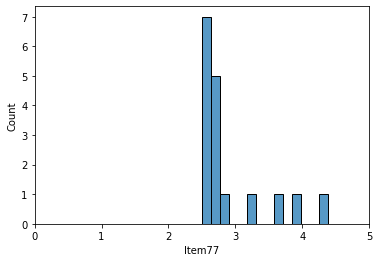

In [96]:
sns.histplot(df.Item77, bins=20)
plt.xlim(0, 5)